# Laboratorio 10 - Algoritmos genéticos

Sebastian Aristondo 20080  
Daniel Gonzalez 20293

El problema a resolver:

En este problema se dese encontrar la cadena de texto que contenga la mayor cantidad de b, para ello se genera una población de cadenas que contienen "a" y "b". Mediante el algoritmo genético se busca que la población evolucione hasta que se encuentre la cadena con la mayor cantidad de b. Solucionar este problema tiene distintas aplicaciones. La primera es en el diseño de circuitos electrónicos, donde encontrar la cadena más larga de "1" permite entender mejor la colocación y enrutamiento de componentes en chips. También puede ayudar con la calidad de representación de imágenes en visión por computadora. Finalmente, puede ayudar en la compresión de datos y en algoritmos de cifrado.

In [123]:
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [124]:
mejores_cadenas = []
palabras_generaciones = []

## **Función objetivo**

In [125]:
def calcular_aptitud(individuo):
    return sum(individuo)

## **Función de selección**

In [126]:
def seleccionar_padres(poblacion, tamaño_torneo):
    padres = []
    for _ in range(2):
        torneo = random.sample(poblacion, tamaño_torneo)
        mejor_individuo = max(torneo, key=calcular_aptitud)
        padres.append(mejor_individuo)
    return padres

## **Función de crossover**

In [127]:
def cruzar(padre1, padre2):
    punto_cruce = random.randint(1, len(padre1) - 1)
    hijo1 = padre1[:punto_cruce] + padre2[punto_cruce:]
    hijo2 = padre2[:punto_cruce] + padre1[punto_cruce:]
    return hijo1, hijo2

## **Función de mutación**

In [128]:
def mutar(individuo, probabilidad_mutacion):
    for i in range(len(individuo)):
        if random.random() < probabilidad_mutacion:
            individuo[i] = 1 - individuo[i]

## **Función de ejecución**

In [129]:
def generar_poblacion_tamaño(tamaño_poblacion, longitud_cadena):
    poblacion = []
    for _ in range(tamaño_poblacion):
        individuo = [random.randint(0, 1) for _ in range(longitud_cadena)]
        poblacion.append(individuo)
    return poblacion


def algoritmo_genetico(tamaño_poblacion, longitud_cadena, tamaño_torneo, probabilidad_mutacion, generaciones):
    poblacion = generar_poblacion_tamaño(tamaño_poblacion, longitud_cadena)
    for i in range(generaciones):
        nueva_poblacion = []
        for _ in range(tamaño_poblacion // 2):
            padre1, padre2 = seleccionar_padres(poblacion, tamaño_torneo)
            hijo1, hijo2 = cruzar(padre1, padre2)
            mutar(hijo1, probabilidad_mutacion)
            mutar(hijo2, probabilidad_mutacion)
            nueva_poblacion.extend([hijo1, hijo2])
        poblacion = nueva_poblacion
        mejores_cadenas = sorted(poblacion, key=calcular_aptitud, reverse=True)
        palabras_generaciones.append(mejores_cadenas)  # Aquí, se toman las 10 cadenas más aptas
        mejor_individuo = max(poblacion, key=calcular_aptitud)
        if calcular_aptitud(mejor_individuo) == longitud_cadena:
            print("Se encontró la solución en la generación", i+1)
            break

    mejor_individuo = max(poblacion, key=calcular_aptitud)
    return mejor_individuo

# Parámetros del algoritmo
tamaño_poblacion = 20
longitud_cadena = 20
tamaño_torneo = 5
probabilidad_mutacion = 0.1
generaciones = 100
mejor_solucion = algoritmo_genetico(tamaño_poblacion, longitud_cadena, tamaño_torneo, probabilidad_mutacion, generaciones)
mejor_solucion_string = [str(x) for x in mejor_solucion]
mejor_solucion_string = "".join(mejor_solucion_string).replace("0", "a").replace("1", "b")
print("Mejor solución encontrada:", mejor_solucion_string)
print("Aptitud de la mejor solución:", calcular_aptitud(mejor_solucion))


Se encontró la solución en la generación 9
Mejor solución encontrada: bbbbbbbbbbbbbbbbbbbb
Aptitud de la mejor solución: 20


## **Poblaciones generadas**

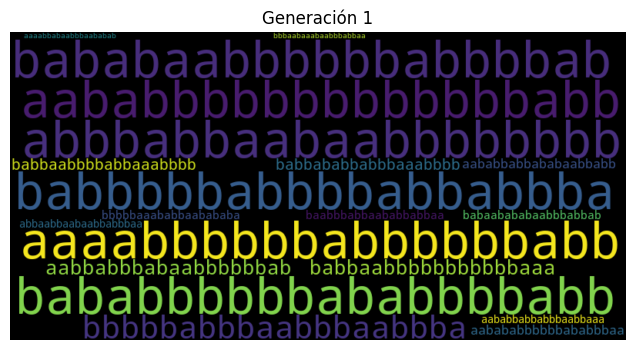

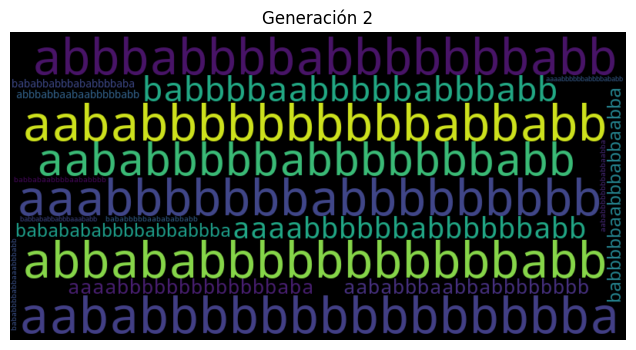

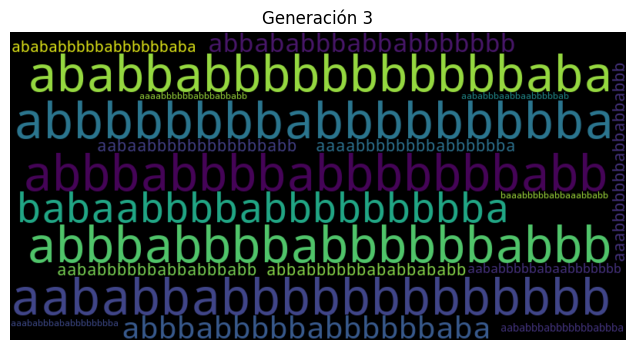

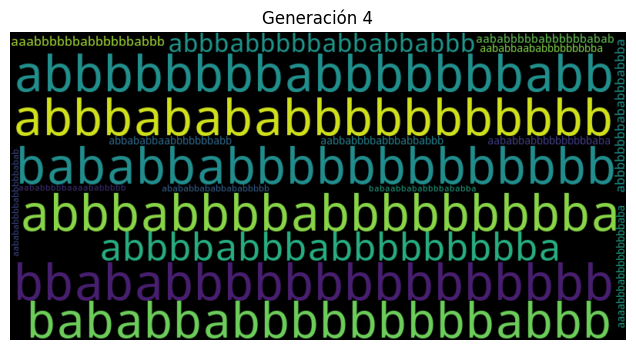

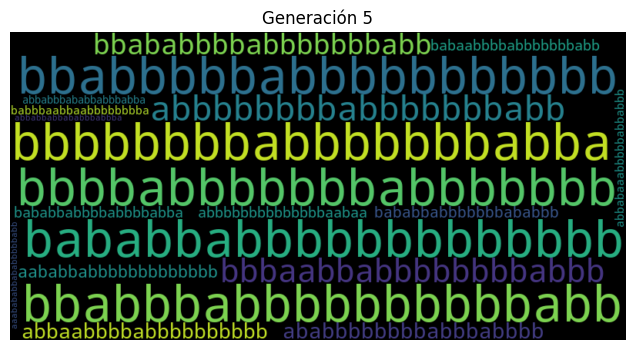

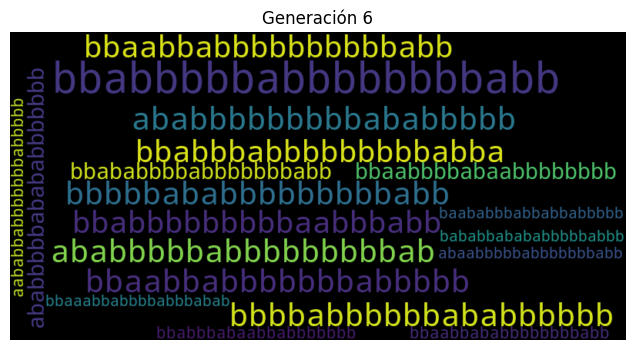

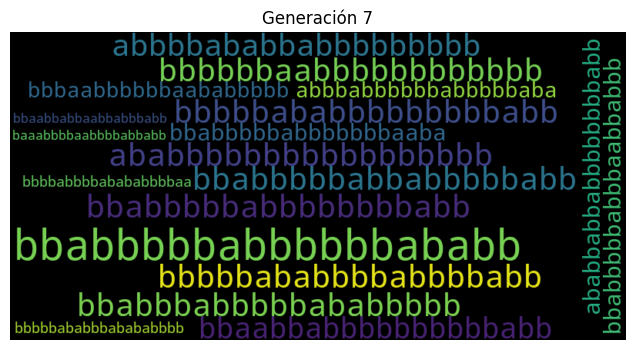

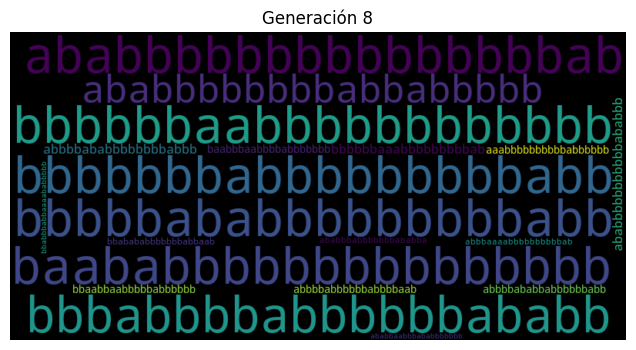

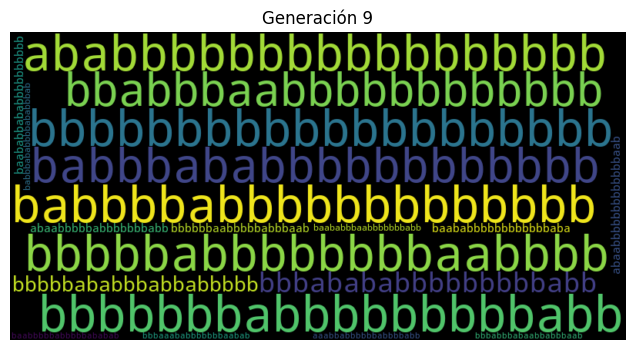

In [130]:

for generacion, palabras in enumerate(palabras_generaciones):
        palabras_string = ["".join(map(str, palabra)) for palabra in palabras]
        string_res = " ".join(palabras_string).replace("0", "a").replace("1", "b")
        
        wordcloud = WordCloud(width=800, height=400).generate(string_res)
        plt.figure(figsize=(8, 4))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.title(f"Generación {generacion + 1}")
        plt.axis("off")
        plt.show()